In [1]:
from matplotlib import pyplot as plt

In [2]:
import statistics
import numpy as np
import pandas as pd 
def create_features(dataframe, limbangle_raw = 'shoulderLangle'):
    df = pd.read_csv(dataframe)
    df.where(df[limbangle_raw] > 5, inplace = True)
    df.dropna(inplace = True) 
    limbangle = df[limbangle_raw].to_numpy()
    mean_limb = statistics.mean(limbangle)
    median_limb = statistics.median(limbangle)
    variance_limb = statistics.variance(limbangle)
    return_list = [mean_limb,median_limb,variance_limb]

    return return_list

In [3]:
import os
import pandas as pd

def import_data(folder):
    list_of_files = os.listdir(folder)
    files = [folder + x  for x in list_of_files]
    return files, len(files)

def create_train_set(limbs = ['shoulderRangle', 'shoulderLangle','shoulderLTransv','shoulderRTransv','kneeLangle','kneeRangle','elbowLangle','elbowRangle'], folder = '/home/priscila/Mestrado/classificacao/mne/' ):
    index = []
    tags = ["mean", "median","variance"]
    #tags = ["mean", "median","variance", "bin0", "bin1", "bin2", "bin3", "bin4"]
    #df_columns = ['time']
    #df_columns = []
    df_columns = [tag + limb for limb in limbs for tag in tags ]
    dataframes = import_data(folder)[0]
    rows = []
    for dataframe in dataframes:
        row =  []
        for limb in limbs:
            limb_info = create_features(dataframe = dataframe, limbangle_raw = limb)
            row = row + limb_info
        rows.append(row)
    df = pd.DataFrame(rows, columns = df_columns) 
    return df

In [4]:
train_set = create_train_set( folder = '/home/priscila/Mestrado/classificacao/first_implementation/JigsawPuzzle/')
train_set

,meanshoulderRangle,medianshoulderRangle,varianceshoulderRangle,meanshoulderLangle,medianshoulderLangle,varianceshoulderLangle,meanshoulderLTransv,medianshoulderLTransv,varianceshoulderLTransv,meanshoulderRTransv,...,variancekneeLangle,meankneeRangle,mediankneeRangle,variancekneeRangle,meanelbowLangle,medianelbowLangle,varianceelbowLangle,meanelbowRangle,medianelbowRangle,varianceelbowRangle
0,30.442667,24.0,468.688900,44.065787,37.0,903.388559,72.027915,71.0,1155.334272,60.076842,...,1142.285990,54.596975,58.0,1163.041475,54.154115,53.0,344.249757,61.932880,60.0,659.987669
1,46.000000,34.0,742.000000,18.000000,16.0,90.157854,36.210983,23.0,863.135224,46.221526,...,75.000000,16.165391,15.0,96.863482,37.000000,40.0,78.000000,54.975488,44.0,493.476027
2,44.000000,39.0,395.000000,30.040320,24.0,369.892707,57.914110,71.0,1101.951465,57.931624,...,15.000000,15.000000,15.0,5.000000,41.000000,39.0,83.000000,50.000000,48.0,220.000000
3,29.370167,28.0,56.920006,18.666447,15.0,157.677049,49.447643,39.0,1345.402449,37.759176,...,45.000000,19.216451,20.0,29.365141,51.708316,43.0,385.330144,40.333544,39.0,62.764992
4,23.595930,23.5,32.905596,40.547577,42.0,59.782991,63.000000,62.0,65.000000,72.000000,...,181.000000,27.681671,26.0,200.839190,12.663532,10.0,84.407920,15.569628,11.0,197.864517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,28.495183,27.0,101.015398,42.625847,37.0,618.393114,36.191795,32.0,522.586079,45.405208,...,41.400109,20.963016,16.0,239.679074,48.000000,49.0,296.000000,44.000000,36.0,384.000000
424,28.483496,23.0,312.820367,35.622505,30.0,384.802325,54.822708,51.0,710.649035,64.871670,...,1017.622308,21.123653,11.0,648.319457,54.000000,56.0,551.000000,39.052644,38.0,498.723325
425,26.758412,21.0,294.692581,53.000000,55.0,777.000000,58.283614,38.0,1791.410878,43.159876,...,33.000000,11.648116,11.0,46.006329,41.804574,38.0,369.777101,52.000000,43.0,533.000000
426,30.000000,31.0,29.000000,73.000000,73.0,451.000000,53.000000,54.0,83.000000,36.258929,...,22.000000,70.000000,70.0,42.000000,72.000000,73.0,68.000000,69.000000,69.0,31.000000


In [5]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
train_set['PCA1'], train_set['PCA2'] = pca.fit_transform(train_set).T

In [6]:
train_set

,meanshoulderRangle,medianshoulderRangle,varianceshoulderRangle,meanshoulderLangle,medianshoulderLangle,varianceshoulderLangle,meanshoulderLTransv,medianshoulderLTransv,varianceshoulderLTransv,meanshoulderRTransv,...,mediankneeRangle,variancekneeRangle,meanelbowLangle,medianelbowLangle,varianceelbowLangle,meanelbowRangle,medianelbowRangle,varianceelbowRangle,PCA1,PCA2
0,30.442667,24.0,468.688900,44.065787,37.0,903.388559,72.027915,71.0,1155.334272,60.076842,...,58.0,1163.041475,54.154115,53.0,344.249757,61.932880,60.0,659.987669,1121.598492,-934.539732
1,46.000000,34.0,742.000000,18.000000,16.0,90.157854,36.210983,23.0,863.135224,46.221526,...,15.0,96.863482,37.000000,40.0,78.000000,54.975488,44.0,493.476027,97.231467,152.040598
2,44.000000,39.0,395.000000,30.040320,24.0,369.892707,57.914110,71.0,1101.951465,57.931624,...,15.0,5.000000,41.000000,39.0,83.000000,50.000000,48.0,220.000000,351.521992,195.542682
3,29.370167,28.0,56.920006,18.666447,15.0,157.677049,49.447643,39.0,1345.402449,37.759176,...,20.0,29.365141,51.708316,43.0,385.330144,40.333544,39.0,62.764992,239.602091,505.035070
4,23.595930,23.5,32.905596,40.547577,42.0,59.782991,63.000000,62.0,65.000000,72.000000,...,26.0,200.839190,12.663532,10.0,84.407920,15.569628,11.0,197.864517,-919.221526,-221.635830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,28.495183,27.0,101.015398,42.625847,37.0,618.393114,36.191795,32.0,522.586079,45.405208,...,16.0,239.679074,48.000000,49.0,296.000000,44.000000,36.0,384.000000,-42.501949,-361.214265
424,28.483496,23.0,312.820367,35.622505,30.0,384.802325,54.822708,51.0,710.649035,64.871670,...,11.0,648.319457,54.000000,56.0,551.000000,39.052644,38.0,498.723325,476.883249,-772.629988
425,26.758412,21.0,294.692581,53.000000,55.0,777.000000,58.283614,38.0,1791.410878,43.159876,...,11.0,46.006329,41.804574,38.0,369.777101,52.000000,43.0,533.000000,726.356696,581.856054
426,30.000000,31.0,29.000000,73.000000,73.0,451.000000,53.000000,54.0,83.000000,36.258929,...,70.0,42.000000,72.000000,73.0,68.000000,69.000000,69.0,31.000000,-1000.130182,-155.732732


In [7]:
from sklearn.cluster import KMeans
X = train_set


Text(0, 0.5, 'Taxa de Variação')

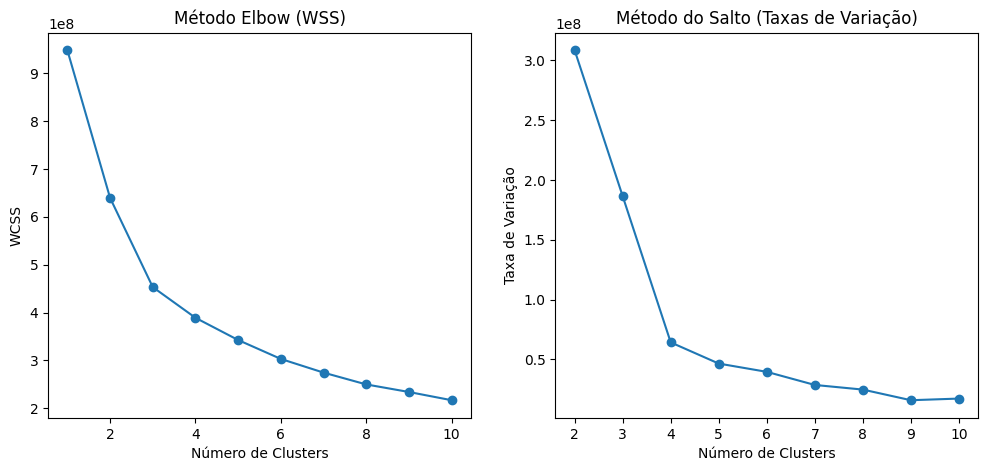

In [8]:
wcss = []
variation_rates = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    if i > 1:
        variation_rates.append(wcss[i - 2] - wcss[i - 1])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método Elbow (WSS)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), variation_rates, marker='o')
plt.title('Método do Salto (Taxas de Variação)')
plt.xlabel('Número de Clusters')
plt.ylabel('Taxa de Variação')

In [9]:
N_CLUSTERS = 3

In [10]:
kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++')
train_set['cluster'] = kmeans.fit_predict(train_set[['PCA1', 'PCA2']])

/home/priscila/miniconda3/envs/mestrado/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
train_set

,meanshoulderRangle,medianshoulderRangle,varianceshoulderRangle,meanshoulderLangle,medianshoulderLangle,varianceshoulderLangle,meanshoulderLTransv,medianshoulderLTransv,varianceshoulderLTransv,meanshoulderRTransv,...,variancekneeRangle,meanelbowLangle,medianelbowLangle,varianceelbowLangle,meanelbowRangle,medianelbowRangle,varianceelbowRangle,PCA1,PCA2,cluster
0,30.442667,24.0,468.688900,44.065787,37.0,903.388559,72.027915,71.0,1155.334272,60.076842,...,1163.041475,54.154115,53.0,344.249757,61.932880,60.0,659.987669,1121.598492,-934.539732,0
1,46.000000,34.0,742.000000,18.000000,16.0,90.157854,36.210983,23.0,863.135224,46.221526,...,96.863482,37.000000,40.0,78.000000,54.975488,44.0,493.476027,97.231467,152.040598,1
2,44.000000,39.0,395.000000,30.040320,24.0,369.892707,57.914110,71.0,1101.951465,57.931624,...,5.000000,41.000000,39.0,83.000000,50.000000,48.0,220.000000,351.521992,195.542682,2
3,29.370167,28.0,56.920006,18.666447,15.0,157.677049,49.447643,39.0,1345.402449,37.759176,...,29.365141,51.708316,43.0,385.330144,40.333544,39.0,62.764992,239.602091,505.035070,2
4,23.595930,23.5,32.905596,40.547577,42.0,59.782991,63.000000,62.0,65.000000,72.000000,...,200.839190,12.663532,10.0,84.407920,15.569628,11.0,197.864517,-919.221526,-221.635830,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,28.495183,27.0,101.015398,42.625847,37.0,618.393114,36.191795,32.0,522.586079,45.405208,...,239.679074,48.000000,49.0,296.000000,44.000000,36.0,384.000000,-42.501949,-361.214265,1
424,28.483496,23.0,312.820367,35.622505,30.0,384.802325,54.822708,51.0,710.649035,64.871670,...,648.319457,54.000000,56.0,551.000000,39.052644,38.0,498.723325,476.883249,-772.629988,0
425,26.758412,21.0,294.692581,53.000000,55.0,777.000000,58.283614,38.0,1791.410878,43.159876,...,46.006329,41.804574,38.0,369.777101,52.000000,43.0,533.000000,726.356696,581.856054,2
426,30.000000,31.0,29.000000,73.000000,73.0,451.000000,53.000000,54.0,83.000000,36.258929,...,42.000000,72.000000,73.0,68.000000,69.000000,69.0,31.000000,-1000.130182,-155.732732,1


In [12]:
train_set.keys()

Index(['meanshoulderRangle', 'medianshoulderRangle', 'varianceshoulderRangle',
       'meanshoulderLangle', 'medianshoulderLangle', 'varianceshoulderLangle',
       'meanshoulderLTransv', 'medianshoulderLTransv',
       'varianceshoulderLTransv', 'meanshoulderRTransv',
       'medianshoulderRTransv', 'varianceshoulderRTransv', 'meankneeLangle',
       'mediankneeLangle', 'variancekneeLangle', 'meankneeRangle',
       'mediankneeRangle', 'variancekneeRangle', 'meanelbowLangle',
       'medianelbowLangle', 'varianceelbowLangle', 'meanelbowRangle',
       'medianelbowRangle', 'varianceelbowRangle', 'PCA1', 'PCA2', 'cluster'],
      dtype='object')

 Numero de amostras 46


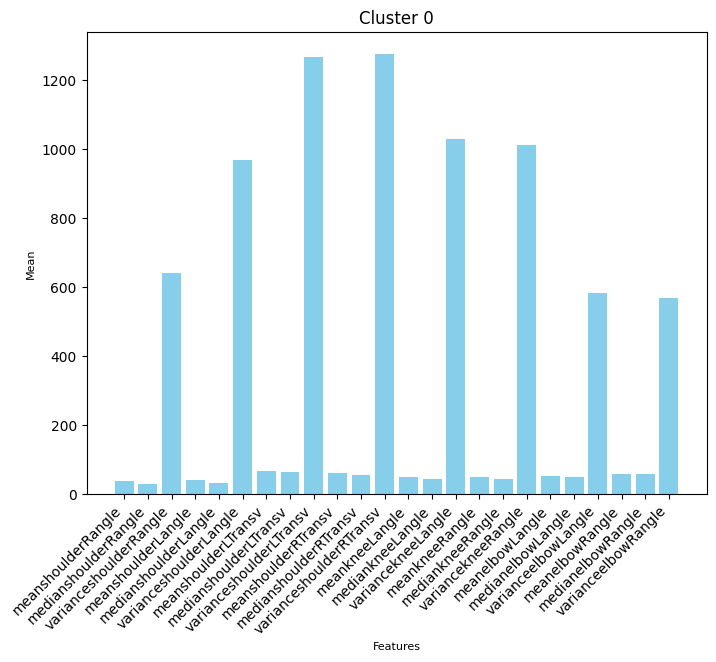

In [13]:
df0 = train_set.loc[train_set['cluster'] == 0 ]
columns = ['meanshoulderRangle', 'medianshoulderRangle', 'varianceshoulderRangle',
       'meanshoulderLangle', 'medianshoulderLangle', 'varianceshoulderLangle',
       'meanshoulderLTransv', 'medianshoulderLTransv',
       'varianceshoulderLTransv', 'meanshoulderRTransv',
       'medianshoulderRTransv', 'varianceshoulderRTransv', 'meankneeLangle',
       'mediankneeLangle', 'variancekneeLangle', 'meankneeRangle',
       'mediankneeRangle', 'variancekneeRangle', 'meanelbowLangle',
       'medianelbowLangle', 'varianceelbowLangle', 'meanelbowRangle',
       'medianelbowRangle', 'varianceelbowRangle']
mean = df0[columns].mean()
plt.figure(figsize=(8, 6))  
plt.bar(mean.index, mean.values, color='skyblue')

plt.xlabel('Features', fontsize=8)
plt.ylabel('Mean', fontsize=8)
plt.title('Cluster 0', fontsize=12)
plt.xticks(rotation=45, ha='right')
print(f" Numero de amostras {df0.shape[0]}")

 Numero de amostras 300


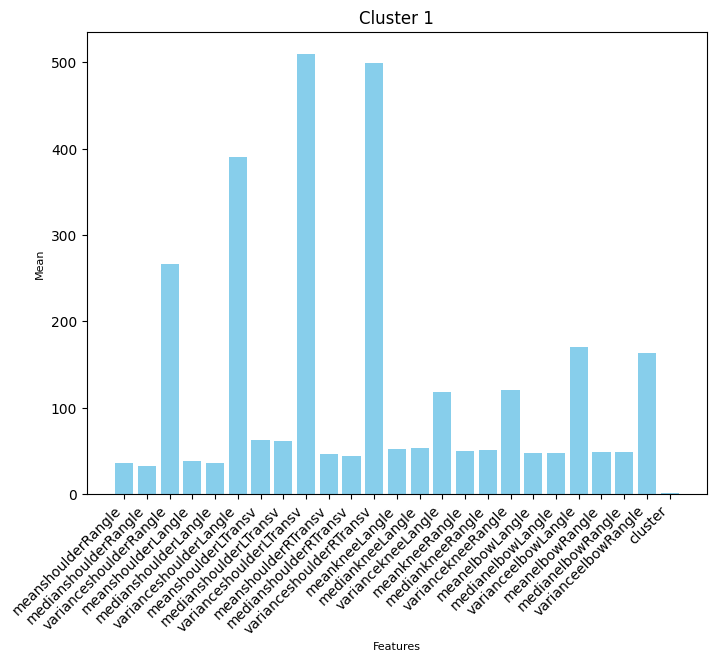

In [14]:
df1 = train_set.loc[train_set['cluster'] == 1 ]
columns = ['meanshoulderRangle', 'medianshoulderRangle', 'varianceshoulderRangle',
       'meanshoulderLangle', 'medianshoulderLangle', 'varianceshoulderLangle',
       'meanshoulderLTransv', 'medianshoulderLTransv',
       'varianceshoulderLTransv', 'meanshoulderRTransv',
       'medianshoulderRTransv', 'varianceshoulderRTransv', 'meankneeLangle',
       'mediankneeLangle', 'variancekneeLangle', 'meankneeRangle',
       'mediankneeRangle', 'variancekneeRangle', 'meanelbowLangle',
       'medianelbowLangle', 'varianceelbowLangle', 'meanelbowRangle',
       'medianelbowRangle', 'varianceelbowRangle',  'cluster']
mean = df1[columns].mean()
plt.figure(figsize=(8, 6))  
plt.bar(mean.index, mean.values, color='skyblue')

plt.xlabel('Features', fontsize=8)
plt.ylabel('Mean', fontsize=8)
plt.title('Cluster 1', fontsize=12)
plt.xticks(rotation=45, ha='right')

print(f" Numero de amostras {df1.shape[0]}")

 Numero de amostras 82


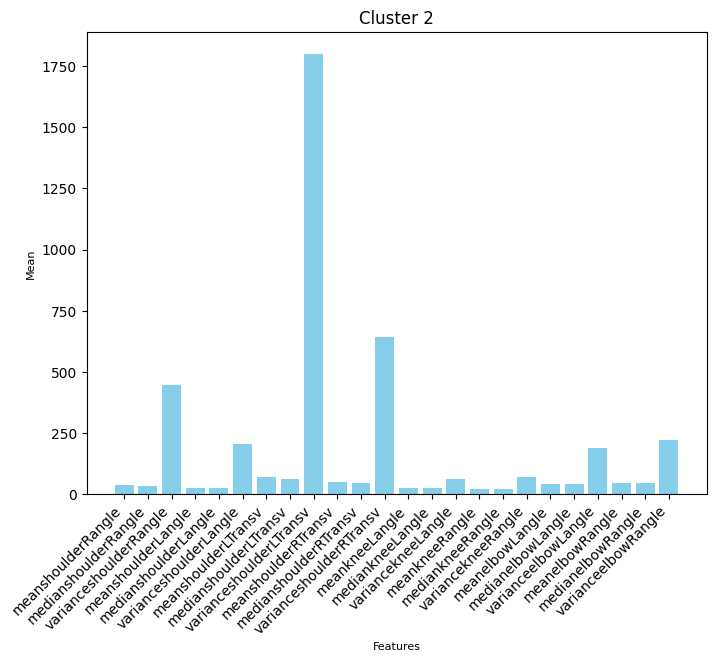

In [15]:
df2 = train_set.loc[train_set['cluster'] == 2 ]
columns = ['meanshoulderRangle', 'medianshoulderRangle', 'varianceshoulderRangle',
       'meanshoulderLangle', 'medianshoulderLangle', 'varianceshoulderLangle',
       'meanshoulderLTransv', 'medianshoulderLTransv',
       'varianceshoulderLTransv', 'meanshoulderRTransv',
       'medianshoulderRTransv', 'varianceshoulderRTransv', 'meankneeLangle',
       'mediankneeLangle', 'variancekneeLangle', 'meankneeRangle',
       'mediankneeRangle', 'variancekneeRangle', 'meanelbowLangle',
       'medianelbowLangle', 'varianceelbowLangle', 'meanelbowRangle',
       'medianelbowRangle', 'varianceelbowRangle']
mean = df2[columns].mean()
plt.figure(figsize=(8, 6))  
plt.bar(mean.index, mean.values, color='skyblue')

plt.xlabel('Features', fontsize=8)
plt.ylabel('Mean', fontsize=8)
plt.title('Cluster 2', fontsize=12)
plt.xticks(rotation=45, ha='right')
print(f" Numero de amostras {df2.shape[0]}")

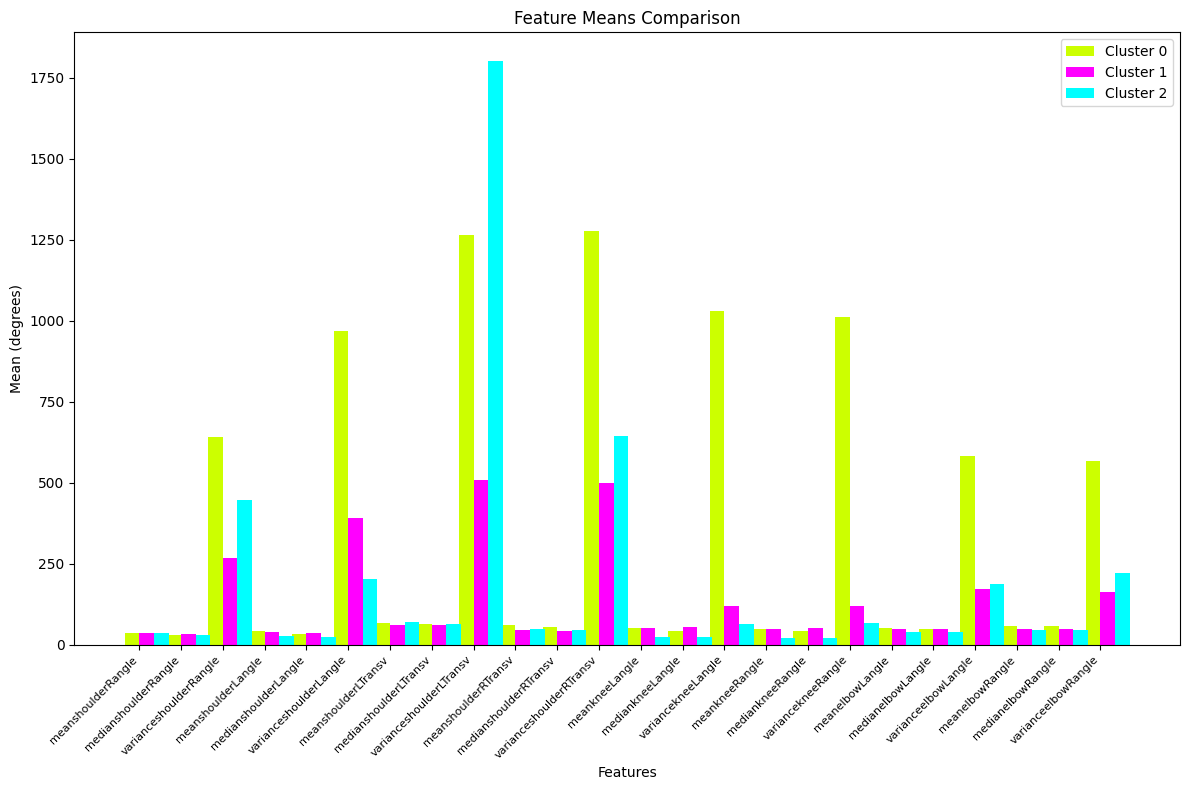

Number of samples in Cluster 2: 82


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have df1 and df2 as defined in your question

# Get the means of the columns (exclude 'cluster') for each cluster
columns = ['meanshoulderRangle', 'medianshoulderRangle', 'varianceshoulderRangle',
       'meanshoulderLangle', 'medianshoulderLangle', 'varianceshoulderLangle',
       'meanshoulderLTransv', 'medianshoulderLTransv',
       'varianceshoulderLTransv', 'meanshoulderRTransv',
       'medianshoulderRTransv', 'varianceshoulderRTransv', 'meankneeLangle',
       'mediankneeLangle', 'variancekneeLangle', 'meankneeRangle',
       'mediankneeRangle', 'variancekneeRangle', 'meanelbowLangle',
       'medianelbowLangle', 'varianceelbowLangle', 'meanelbowRangle',
       'medianelbowRangle', 'varianceelbowRangle']
mean1 = df0[columns].mean()
mean2 = df1[columns].mean()
mean3 = df2[columns].mean()
bar_width = 0.35
index = np.arange(len(columns))

plt.figure(figsize=(12, 8))  # Make the figure wider
plt.bar(index, mean1, bar_width, label='Cluster 0', color='#CCFF00')
plt.bar(index + bar_width, mean2, bar_width, label='Cluster 1', color='#FF00FF')
plt.bar(index + bar_width + bar_width, mean3, bar_width, label='Cluster 2', color='#00FFFF')

plt.xlabel('Features', fontsize=10)
plt.ylabel('Mean (degrees)', fontsize=10)
plt.title('Feature Means Comparison', fontsize=12)
plt.xticks(index + bar_width / 2, columns, rotation=45, ha='right', fontsize=8)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Number of samples in Cluster 2: {df2.shape[0]}")

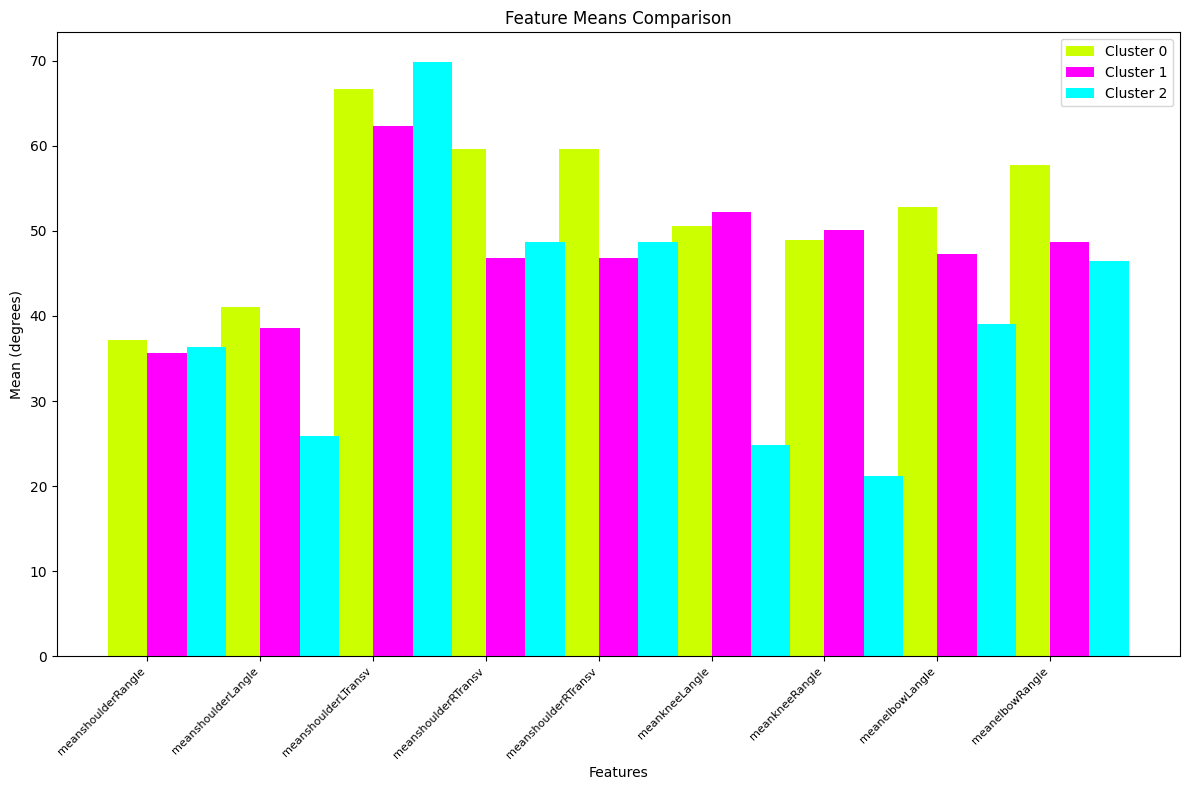

In [17]:

displaying_columns = ['meanshoulderRangle','meanshoulderLangle', 'meanshoulderLTransv', 'meanshoulderRTransv', 'meanshoulderRTransv', 'meankneeLangle',  'meankneeRangle', 'meanelbowLangle', 'meanelbowRangle',   ]
# Get the means of the columns (exclude 'cluster') for each cluster
columns = displaying_columns
mean1 = df0[columns].mean()
mean2 = df1[columns].mean()
mean3 = df2[columns].mean()
bar_width = 0.35
index = np.arange(len(columns))

plt.figure(figsize=(12, 8))  # Make the figure wider
plt.bar(index, mean1, bar_width, label='Cluster 0', color='#CCFF00')
plt.bar(index + bar_width, mean2, bar_width, label='Cluster 1', color='#FF00FF')
plt.bar(index + bar_width + bar_width, mean3, bar_width, label='Cluster 2', color='#00FFFF')

plt.xlabel('Features', fontsize=10)
plt.ylabel('Mean (degrees)', fontsize=10)
plt.title('Feature Means Comparison', fontsize=12)
plt.xticks(index + bar_width / 2, columns, rotation=45, ha='right', fontsize=8)
plt.legend()

plt.tight_layout()
plt.show()

# Predict 

In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [19]:
def create_predict_data(dataframe , limbs = ['shoulderRangle', 'shoulderLangle','shoulderLTransv','shoulderRTransv','kneeLangle','kneeRangle','elbowLangle','elbowRangle'] ):
    index = []
    tags = ["mean", "median","variance"]
    row =  []
    df_columns = [tag + limb for limb in limbs for tag in tags ]
    for limb in limbs:
        limb_info = create_features(dataframe = dataframe, limbangle_raw = limb)
        row = row + limb_info
    return pd.DataFrame([row], columns=df_columns)
    

In [20]:
predict_set = create_predict_data(dataframe = '/home/priscila/Mestrado/panel_dashboard/20240121-160448_JigsawPuzzle.csv')
predict_set['PCA1'], predict_set['PCA2'] = pca.transform(predict_set).T
predict_set['cluster'] = kmeans.predict(predict_set[['PCA1', 'PCA2']])
print(predict_set['cluster'][0])

1


In [21]:
from joblib import dump, load
dump(kmeans, 'unsupervised-jigsaw_puzzle.joblib')

['unsupervised-jigsaw_puzzle.joblib']

In [22]:
dump(pca, 'modelo_pca.joblib')

['modelo_pca.joblib']